## Algorand Covid-19 Project
## Demo: Basic Exploratory Analysis

Source documentation: https://github.com/algorandfoundation/IReport-Covid/blob/master/js/retrieveData.js

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
date = str(datetime.today().strftime('%Y-%m-%d'))

In [2]:
cleaner_data_df = pd.read_csv('data/cleaner_covidData'+date+'.csv')
print(cleaner_data_df.shape)
cleaner_data_df.head()

(1272, 40)


,tx_id,age_group,country_code,state_code,region_code,gender,3_dig_zip,doctors_office,walk_in_clinic,virtual_care,hospital_or_ER,other,hospitalized,when_discharged,still_in_hospital,when_admitted,received_care,symptom_quarantine,voluntary_quarantine,personally_required_quarantine,general_quarantine,when_quarantine_ended,still_in_quarantine,when_quarantine_started,left_quarantine_temporarily,was_quarantined,fever,cough,difficulty_breathing,fatigue,sore_throat,when_symptoms_ended,still_symptomatic,when_symptoms_started,is_symptomatic,test_date,test_location,test_results,tried_to_get_tested,tested
0,UGY5YWRRYLLCDC5SD2BIAUEBXKZROG4N56VT6QRZBZD566...,55.0,US,NY,NY,f,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,1.0,NaN,NaN,NaN,1.0,2020-03-10,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,-1.0,-1.0
1,5USYC4OOGQYGSKRS3LLTRCSLYIX5CY6Y2HIDRY6S3MISED...,40.0,AU,ACT,ACT,m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,-1.0,-1.0
2,MSJEL2ZTRSNKJLA6G5H5ITPLY6ZFYBFVG47G3765XM7OQJ...,65.0,US,CO,NaN,m,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,1.0,NaN,NaN,NaN,2020-03-20,NaN,2020-03-13,-1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,2020-03-20,3.0,-1.0,NaN,1.0
3,FJD33KOQXQ5E2SA5VWB5MAIHXZTKVZUM5NEK7FJN56UKGS...,40.0,US,NY,NY,f,104.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,-1.0,-1.0
4,QTLPDQHRDHMD5NGGIZFSRZ4MQACT3MK76JZ6JMDXDNLIRZ...,20.0,US,MD,MD,m,207.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,-1.0,-1.0


In [3]:
cleaner_data_df.describe() # time columns: when_discharged, when_admitted, when_quarantine_ended, when_quarantine_started

,age_group,3_dig_zip,doctors_office,walk_in_clinic,virtual_care,hospital_or_ER,other,hospitalized,still_in_hospital,received_care,symptom_quarantine,personally_required_quarantine,general_quarantine,left_quarantine_temporarily,was_quarantined,fever,cough,difficulty_breathing,fatigue,sore_throat,still_symptomatic,is_symptomatic,test_location,test_results,tried_to_get_tested,tested
count,1265.000000,602.000000,10.0,5.0,13.0,11.0,2.0,11.000000,2.0,1261.000000,93.0,61.0,362.0,720.000000,1259.000000,77.0,110.0,56.0,110.0,94.0,83.0,1268.000000,31.000000,31.000000,1008.000000,1264.000000
mean,36.752569,314.878738,1.0,1.0,1.0,1.0,1.0,-0.090909,1.0,-0.947661,1.0,1.0,1.0,0.475000,0.229547,1.0,1.0,1.0,1.0,1.0,1.0,-0.741325,2.677419,0.516129,-0.826389,-0.947785
std,15.469998,309.112987,0.0,0.0,0.0,0.0,0.0,1.044466,0.0,0.319406,0.0,0.0,0.0,0.880598,0.973684,0.0,0.0,0.0,0.0,0.0,0.0,0.671411,1.275071,1.121635,0.671906,0.319037
min,1.000000,12.000000,1.0,1.0,1.0,1.0,1.0,-1.000000,1.0,-1.000000,1.0,1.0,1.0,-1.000000,-1.000000,1.0,1.0,1.0,1.0,1.0,1.0,-1.000000,1.000000,-1.000000,-1.000000,-1.000000
25%,20.000000,100.000000,1.0,1.0,1.0,1.0,1.0,-1.000000,1.0,-1.000000,1.0,1.0,1.0,-1.000000,-1.000000,1.0,1.0,1.0,1.0,1.0,1.0,-1.000000,2.000000,-1.000000,-1.000000,-1.000000
50%,30.000000,207.000000,1.0,1.0,1.0,1.0,1.0,-1.000000,1.0,-1.000000,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,-1.000000,3.000000,1.000000,-1.000000,-1.000000
75%,50.000000,372.000000,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,-1.000000,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,-1.000000,4.000000,1.000000,-1.000000,-1.000000
max,85.000000,986.000000,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.000000,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,5.000000,2.000000,2.000000,1.000000


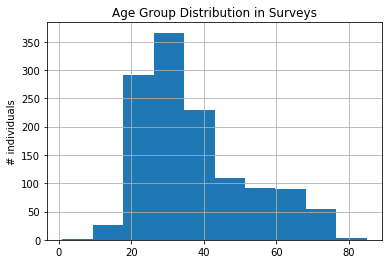

In [4]:
cleaner_data_df.age_group.hist()
plt.title("Age Group Distribution in Surveys")
plt.ylabel("# individuals")
plt.show()

In [5]:
def get_stats(df):
    print("{} survey responses with data".format(len(df)))
    print('\n')
    num_was_wasnot_quar = len(df[(df.was_quarantined==1.0)|(df.was_quarantined==-1.0)])
    num_was_quar = len(df[df.was_quarantined==1.0])
    print("From {} responses : {}% reported being quarantined".format(num_was_wasnot_quar,round(100*num_was_quar/num_was_wasnot_quar,2)))
    num_left_stayed_quar = len(df[(df.left_quarantine_temporarily==1.0)|(df.left_quarantine_temporarily==-1.0)])
    num_left_quar = len(df[(df.left_quarantine_temporarily==1.0)])
    
    num_quar_left_quar = len(df[(df.was_quarantined==1.0)&(df.left_quarantine_temporarily==1.0)])
    print("From those that reported being quarantined {}% left temporarily".format(round(100*num_quar_left_quar/num_was_quar,2)))

    print('\n')
    symptomatic_df = df[df.is_symptomatic==1.0]
    print("From {} people who are symptomatic".format(len(symptomatic_df)))
    print('\n')
    print("{}% got care at the doctor's office".format(round(100*len(symptomatic_df[symptomatic_df.doctors_office==1.0])/len(symptomatic_df),2)))
    print("{}% got care at a walk in clinic".format(round(100*len(symptomatic_df[symptomatic_df.walk_in_clinic==1.0])/len(symptomatic_df),2)))
    print("{}% got virtual care".format(round(100*len(symptomatic_df[symptomatic_df.virtual_care==1.0])/len(symptomatic_df),2)))
    print("{}% got care at the hospital/ER".format(round(100*len(symptomatic_df[symptomatic_df.hospital_or_ER==1.0])/len(symptomatic_df),2)))
    print('\n')
    print("{}% reported a fever".format(round(100*len(symptomatic_df[symptomatic_df.fever==1.0])/len(symptomatic_df),2)))
    print("{}% reported a cough".format(round(100*len(symptomatic_df[symptomatic_df.cough==1.0])/len(symptomatic_df),2)))
    print("{}% reported difficulty breathing".format(round(100*len(symptomatic_df[symptomatic_df.difficulty_breathing==1.0])/len(symptomatic_df),2)))
    print("{}% reported fatigue".format(round(100*len(symptomatic_df[symptomatic_df.fatigue==1.0])/len(symptomatic_df),2)))
    print("{}% reported sore throat".format(round(100*len(symptomatic_df[symptomatic_df.sore_throat==1.0])/len(symptomatic_df),2)))

In [6]:
get_stats(cleaner_data_df)

1272 survey responses with data


From 1259 responses : 61.48% reported being quarantined
From those that reported being quarantined 68.6% left temporarily


From 164 people who are symptomatic


6.1% got care at the doctor's office
3.05% got care at a walk in clinic
7.32% got virtual care
4.27% got care at the hospital/ER


46.95% reported a fever
67.07% reported a cough
34.15% reported difficulty breathing
67.07% reported fatigue
57.32% reported sore throat


In [7]:
def encode_cols(df):
    cols_to_encode = ['hospitalized','received_care','left_quarantine_temporarily',
                      'was_quarantined','is_symptomatic','test_location','test_results',
                      'tried_to_get_tested','tested','gender','age_group']

    cols_not_encoding = ['country_code','state_code','doctors_office','walk_in_clinic','virtual_care','hospital_or_ER',
                         'other','symptom_quarantine','voluntary_quarantine','personally_required_quarantine',
                         'general_quarantine','still_in_quarantine','still_symptomatic',
                          'fever','cough','difficulty_breathing','fatigue','sore_throat']

    adjusted_df = pd.get_dummies(data=df[cols_to_encode], 
                                 columns=cols_to_encode)

    adjusted_cols = ['not_hospitalized','hospitalized',
                     'no_care_received','care_received',
                     'stayed_in_quarantine','left_quarantine_temporarily',
                     'not_quarantined','was_quarantined',
                     'not_symptomatic','is_symptomatic',
                     'tested_at_dr_office','tested_at_hospital','tested_at_urgent_care','tested_at_ad_hoc',
                     'tested_at_other','tested_negative','tested_positive','tested_still_waiting',
                     'testing_not_attempted','testing_attempted','testing_attempted_and_denied',
                     'not_tested','tested',
                     'female','male']
    
    for age_value in sorted(list(set(df.age_group.dropna()))):
        adjusted_cols.append('age_group_'+str(int(age_value)))

    adjusted_df.columns = adjusted_cols
    new_df_counts = df[cols_not_encoding].join(adjusted_df)
    #print(new_df_counts.shape)

    country_df_counts = new_df_counts.dropna(axis=0, subset=['country_code']).drop('state_code',axis=1).fillna(0).reset_index(drop=True)
    country_df_counts[['voluntary_quarantine', 'still_in_quarantine']] = country_df_counts[['voluntary_quarantine', 'still_in_quarantine']].astype(bool).astype(float)
    country_state_df_counts = new_df_counts.dropna(axis=0, subset=['country_code','state_code']).fillna(0).reset_index(drop=True)
    country_state_df_counts[['voluntary_quarantine', 'still_in_quarantine']] = country_state_df_counts[['voluntary_quarantine', 'still_in_quarantine']].astype(bool).astype(float)
    
    return country_df_counts, country_state_df_counts

In [8]:
country_df_counts, country_state_df_counts = encode_cols(cleaner_data_df)

In [9]:
# groupbys
country_state_df_counts = country_state_df_counts.groupby(['country_code','state_code']).sum().reset_index()
country_only_df_counts = country_df_counts.groupby(['country_code']).sum().reset_index()

In [10]:
country_state_df_counts.to_csv('data/global_country_state_counts'+date+'.csv',index=False)
country_only_df_counts.to_csv('data/global_country_counts'+date+'.csv',index=False)

In [11]:
US_grouped_df = country_state_df_counts[country_state_df_counts.country_code == 'US'].reset_index(drop=True)
US_grouped_df.to_csv('data/US_state_sums'+date+'.csv',index=False)

In [12]:
#country_df_counts.head()

In [13]:
#country_state_df_counts.head()

In [14]:
#country_only_df_counts.head()

In [15]:
#country_state_df_counts.head()

In [20]:
def get_hist(df,size):
    plt.figure(figsize=size)
    plt.bar(df.columns,list(df.loc[0].values),color=list('rgbkymc'))
    plt.ylabel("# individuals")
    plt.show()

def country_stat_display(df,country):
    num_surveys = len(country_df_counts[country_df_counts.country_code==country])
    print("From {} surveys in {}...\n".format(num_surveys,country))
    for col in df.columns[1:6]:
        print("{} got care from {} [{}%]".format(int(sum(df[col])),col,round((100*sum(df[col]))/num_surveys,2)))
    get_hist(df[df.columns[1:6]].reset_index(drop=True),(12,5))
    print('\n')
    for col in df.columns[6:10]:
        print("{} underwent {} [{}%]".format(int(sum(df[col])),col.replace("_"," "),round((100*sum(df[col]))/num_surveys,2)))
    get_hist(df[df.columns[6:10]].reset_index(drop=True),(12,5))
    print('\n')
    for col in df.columns[12:17]:
        print("{} reported {} [{}%]".format(int(sum(df[col])),col,round((100*sum(df[col]))/num_surveys,2)))
    get_hist(df[df.columns[12:17]].reset_index(drop=True),(12,5))
    print('\n')
    for col in df.columns[19:21]:
        print("{} received {} [{}%]".format(int(sum(df[col])),col.replace("_"," ").replace("received",""),round((100*sum(df[col]))/num_surveys,2)))
    get_hist(df[df.columns[19:21]].reset_index(drop=True),(6,5))
    print('\n')
    
    other_col_ranges = [df.columns[10:12],df.columns[21:23],df.columns[25:27],df.columns[27:32],df.columns[32:35],
                        df.columns[35:38],df.columns[38:40],df.columns[40:42],df.columns[42:]]
    other_col_plt_sizes = [(6,5),(6,5),(6,5),(12,5),(12,5),(12,5),(6,5),(6,5),(17,5)]
    
    for col_subset,plt_size in zip(other_col_ranges,other_col_plt_sizes):
        for col in col_subset:
            print("{} {} [{}%]".format(int(sum(df[col])),col.replace("_"," "),round((100*sum(df[col]))/num_surveys,2)))
        get_hist(df[col_subset].reset_index(drop=True),plt_size)
        print('\n')

### US level analysis

In [17]:
US_grouped_df.head()

,country_code,state_code,doctors_office,walk_in_clinic,virtual_care,hospital_or_ER,other,symptom_quarantine,voluntary_quarantine,personally_required_quarantine,general_quarantine,still_in_quarantine,still_symptomatic,fever,cough,difficulty_breathing,fatigue,sore_throat,not_hospitalized,hospitalized,no_care_received,care_received,stayed_in_quarantine,left_quarantine_temporarily,not_quarantined,was_quarantined,not_symptomatic,is_symptomatic,tested_at_dr_office,tested_at_hospital,tested_at_urgent_care,tested_at_ad_hoc,tested_at_other,tested_negative,tested_positive,tested_still_waiting,testing_not_attempted,testing_attempted,testing_attempted_and_denied,not_tested,tested,female,male,age_group_1,age_group_10,age_group_20,age_group_30,age_group_40,age_group_50,age_group_55,age_group_60,age_group_65,age_group_70,age_group_75,age_group_85
0,US,AL,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2,0,0,2,0,2,2,0,0,0,0,0,0,0,0,0,2,0,0,2,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0
1,US,AR,2.0,0.0,0.0,0.0,0.0,3.0,5.0,1.0,3.0,7.0,2.0,2.0,2.0,1.0,2.0,0.0,0,0,8,2,2,5,3,7,7,3,2,0,0,0,0,0,2,0,5,1,0,8,2,6,4,0,0,3,2,1,2,0,0,1,0,0,1
2,US,AZ,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,1.0,4.0,2.0,1.0,2.0,0.0,0.0,1.0,0,0,6,0,3,1,2,4,4,2,0,0,0,0,0,0,0,0,6,0,0,6,0,4,2,0,0,2,3,0,0,1,0,0,0,0,0
3,US,CA,0.0,0.0,0.0,0.0,0.0,3.0,26.0,3.0,25.0,37.0,4.0,3.0,8.0,1.0,6.0,8.0,0,0,60,0,5,28,20,39,51,9,0,0,0,1,0,1,0,0,45,1,3,59,1,22,36,0,1,11,20,12,7,5,2,0,2,0,0
4,US,CO,0.0,0.0,1.0,0.0,0.0,4.0,12.0,1.0,8.0,19.0,5.0,1.0,2.0,2.0,4.0,4.0,0,0,26,1,5,12,7,20,20,7,0,0,1,0,0,1,0,0,19,1,1,26,1,14,12,0,0,3,9,6,0,2,2,3,2,0,0


In [18]:
unq_states = list(set(US_grouped_df.state_code))
print("Data from {} states".format(len(unq_states)))

Data from 41 states


From 618 surveys in US...

4 got care from doctors_office [0.65%]
3 got care from walk_in_clinic [0.49%]
9 got care from virtual_care [1.46%]
5 got care from hospital_or_ER [0.81%]
1 got care from other [0.16%]


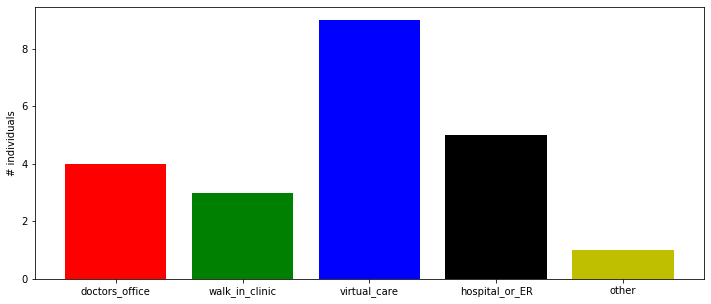



53 underwent symptom quarantine [8.58%]
309 underwent voluntary quarantine [50.0%]
22 underwent personally required quarantine [3.56%]
156 underwent general quarantine [25.24%]


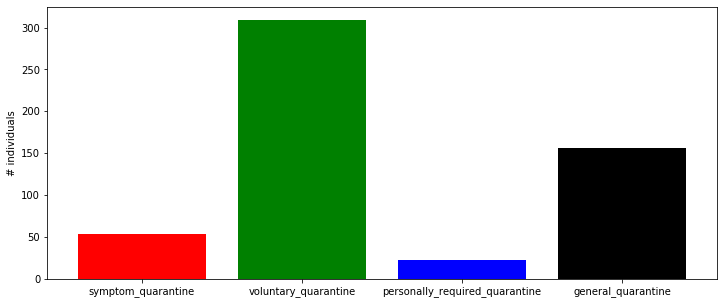



43 reported fever [6.96%]
63 reported cough [10.19%]
30 reported difficulty_breathing [4.85%]
65 reported fatigue [10.52%]
52 reported sore_throat [8.41%]


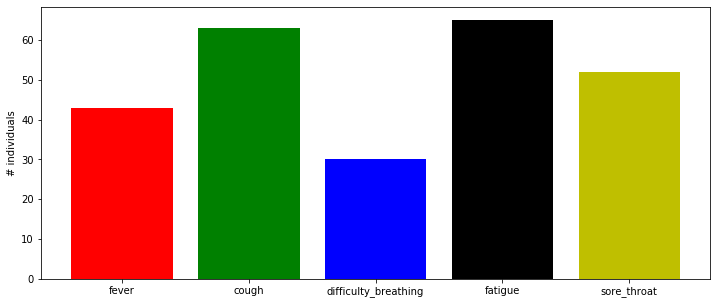



599 received no care  [96.93%]
17 received care  [2.75%]


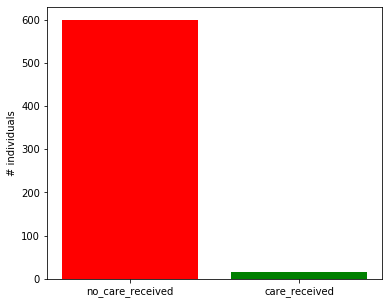



373 still in quarantine [60.36%]
46 still symptomatic [7.44%]


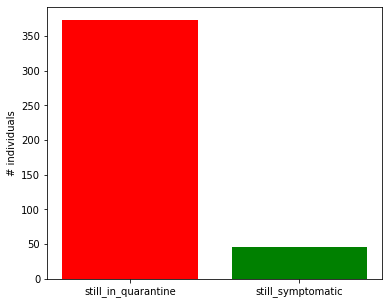



74 stayed in quarantine [11.97%]
309 left quarantine temporarily [50.0%]


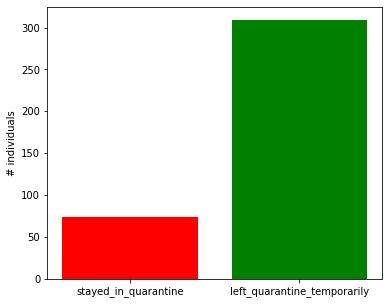



527 not symptomatic [85.28%]
89 is symptomatic [14.4%]


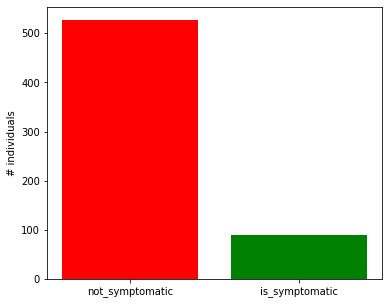



5 tested at dr office [0.81%]
5 tested at hospital [0.81%]
4 tested at urgent care [0.65%]
6 tested at ad hoc [0.97%]
1 tested at other [0.16%]


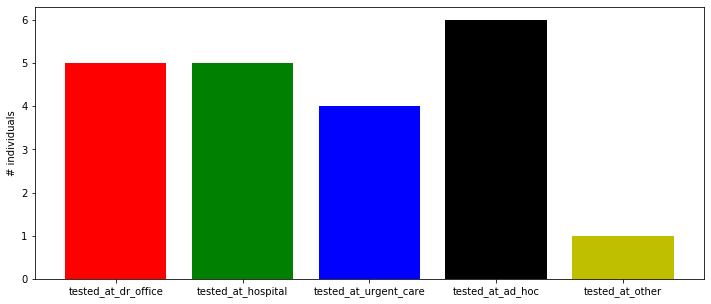



6 tested negative [0.97%]
13 tested positive [2.1%]
2 tested still waiting [0.32%]


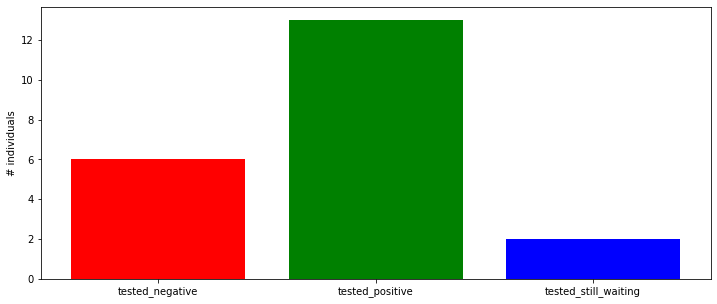



468 testing not attempted [75.73%]
7 testing attempted [1.13%]
24 testing attempted and denied [3.88%]


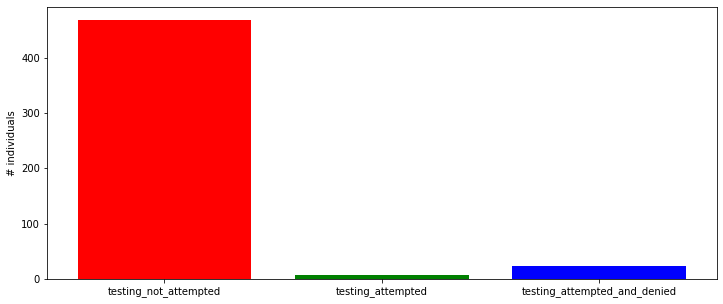



593 not tested [95.95%]
21 tested [3.4%]


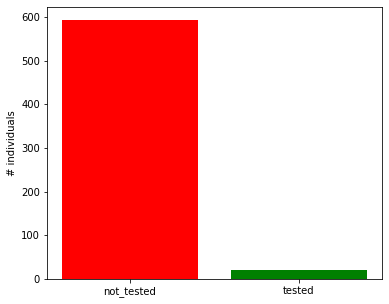



319 female [51.62%]
287 male [46.44%]


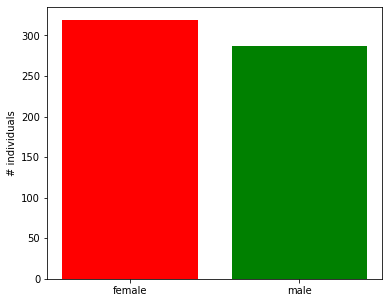



0 age group 1 [0.0%]
13 age group 10 [2.1%]
146 age group 20 [23.62%]
185 age group 30 [29.94%]
97 age group 40 [15.7%]
42 age group 50 [6.8%]
41 age group 55 [6.63%]
25 age group 60 [4.05%]
23 age group 65 [3.72%]
38 age group 70 [6.15%]
5 age group 75 [0.81%]
1 age group 85 [0.16%]


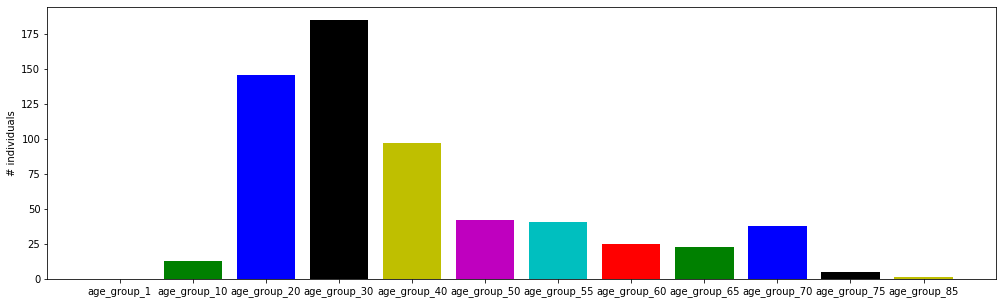

In [21]:
country_stat_display(country_only_df_counts[country_only_df_counts.country_code == 'US'],'US')